## 🤖 **Get the data**

### 🚀 **Download the Data**

In [1]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

### 🚀 **Load the data using pandas**

In [3]:
import pandas as pd

# 讀取 csv 檔案
def loading_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)    

In [4]:
data = loading_housing_data()

讀取整筆 datasets 數據

In [5]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


讀取 datasets 前五項數據

In [6]:
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


讀取 datasets 中每個欄位、count數量、資料型別 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


顯示 DataFrame 中「數值型態」變數的描述統計資訊，結果包括 count、平均值、標準差、最小值、25%，50%（中位數）、75% 和最大值。
1. count：顯示每個特徵「非缺失值」的數量
2. mean：顯示每個特徵的平均值
3. standaerd deviation：可以衡量每個數據點與平均值的分散程度（標準差越大，數據越分散）
4. minimum value：每個特徵的最小值
5. 25%、50%、75%（Percentiles）：用來評估數據的分佈
6. maximum value：每個特徵的最大值

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### 繪製直方圖(histgram)

> 數據的範圍會被分為若干個區間，稱為「箱子」(bins)

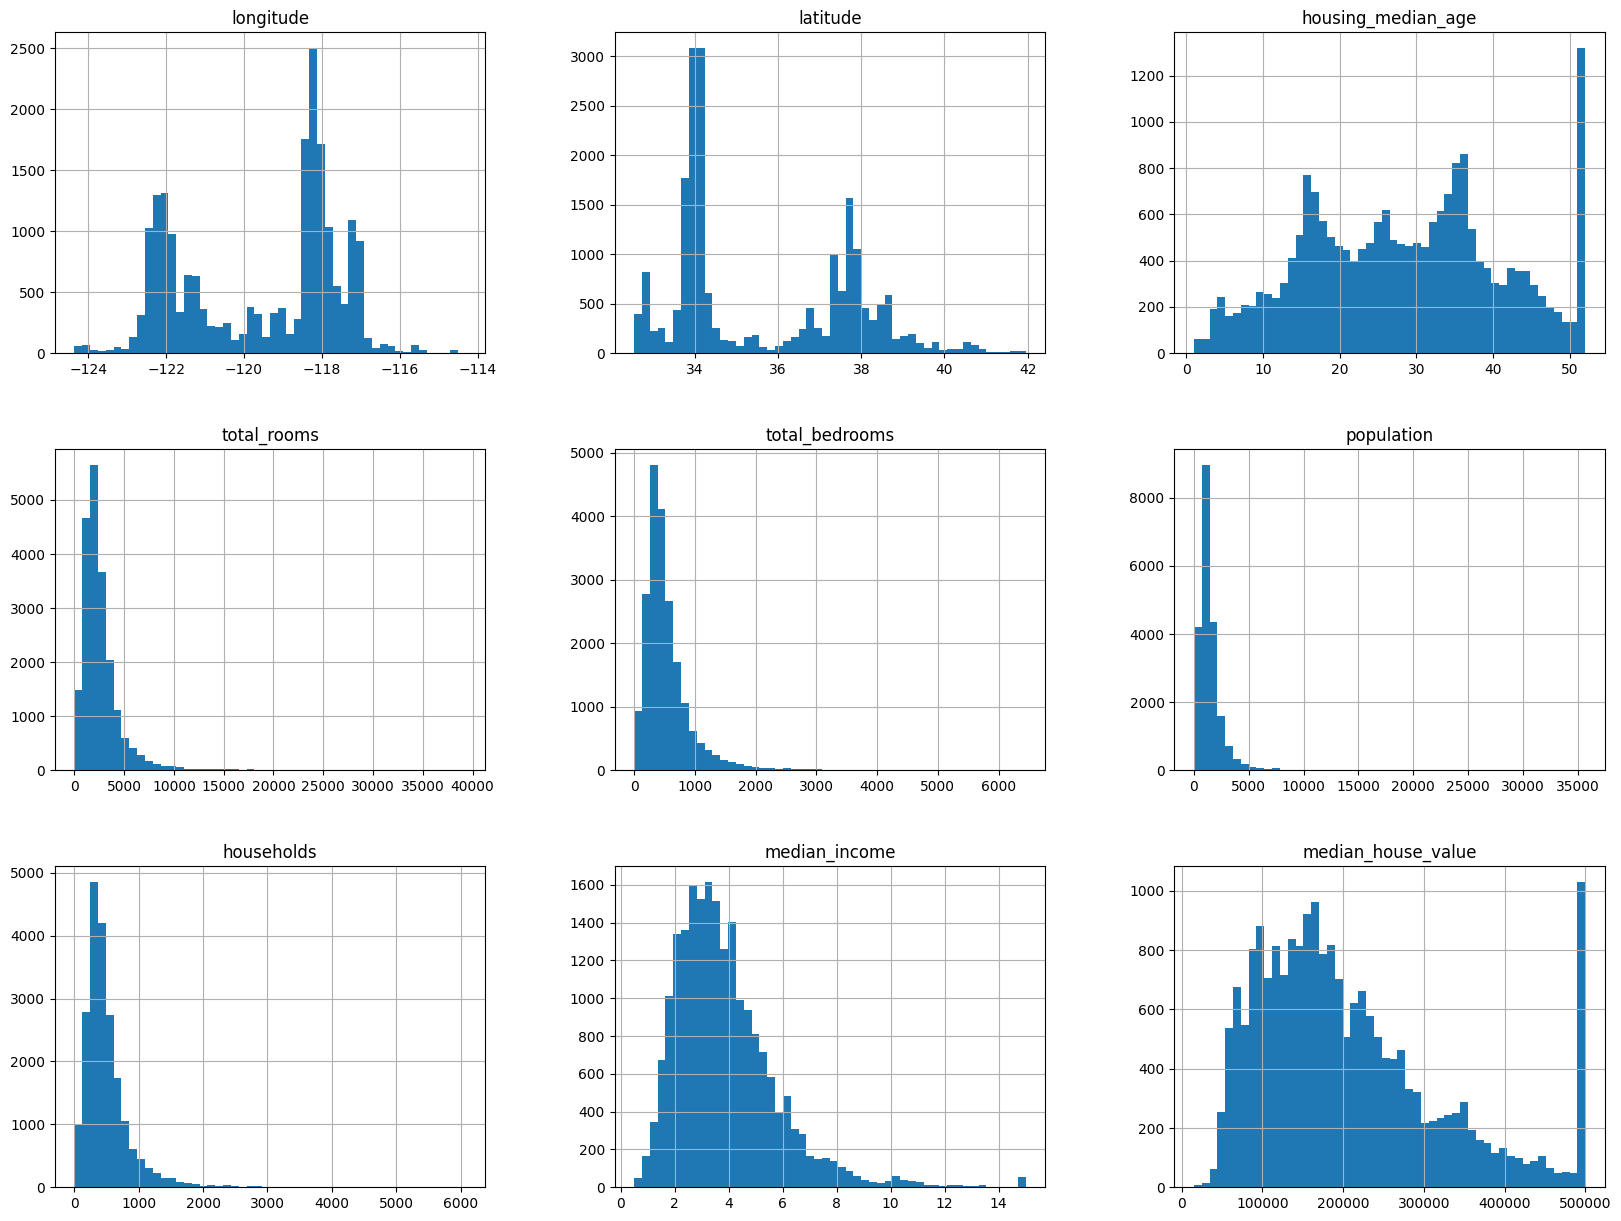

In [9]:
import matplotlib.pyplot as plt

data.hist(bins= 50, figsize=(20,15))
plt.show()

### 🚀 **Create testing datasets**

In [10]:
import numpy as np
np.random.seed(42)

#### **分割資料集**
1. pick some instances randomly, typiclly 20% of the datasets

2. dataset -> traing set and testing set 

In [11]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indicates = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)

    test_indicates = shuffled_indicates[:test_set_size]
    train_indicates = shuffled_indicates[test_set_size:]
    return data.iloc[test_indicates], data.iloc[train_indicates]

In [12]:
test_set, train_set = split_train_test(data, test_ratio=0.2)
print(len(data))
print(len(test_set))
print(len(train_set))  

20640
4128
16512


In [13]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


#### **Use CRC to calculate checksum of data**
在原本的資料集中加入新的資料，新產生出的 testing set 中不會有已經訓練過的資料（避免資料窺探）。

lambda id_: test_set_check(id_, test_ratio)
➡︎ lambda 為匿名函數，它可以接受一個識別符 id_ ，然後將它傳遞給 test_set_check function

In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    # Convert identifier to 64 bits integer, and perform bit operations
    # 如果計算後的數值 < test ratio's 32 bit，則放入 testing set
    return crc32(np.int64(identifier) & 0xffffffff) < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
    # id column is unique identifier
    ids = data[id_column] 
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    # 使用位反操作符 ~，將 in_test_set 中的布林值取反，可以得到在測試集之外的實例 (= traing set)
    return data.loc[in_test_set], data.loc[~in_test_set]

Reset the index (add index column)
➡︎ the old index is added as a column, and a new sequential index is used.

In [15]:
data_id = data.reset_index()
test_set, train_set = split_train_test_by_id(data_id, test_ratio= 0.2, id_column= "index") 
test_set.head()

data_id["id"] = data["longitude"] * 1000 + data["latitude"]
test_set, train_set = split_train_test_by_id(data_id, test_ratio=0.2, id_column= "id")

test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
118,118,-122.23,37.84,50.0,2515.0,399.0,970.0,373.0,5.8596,327600.0,NEAR BAY,-122192.16
119,119,-122.23,37.84,47.0,3175.0,454.0,1098.0,485.0,5.2868,347600.0,NEAR BAY,-122192.16
122,122,-122.23,37.85,52.0,2800.0,411.0,1061.0,403.0,6.3434,373600.0,NEAR BAY,-122192.15
127,127,-122.21,37.84,44.0,3424.0,597.0,1358.0,597.0,6.0194,292300.0,NEAR BAY,-122172.16


Scikit-Learn
1. Scikit-Learn privide some function
2. Alomost the same as split_train_set() function

當再次執行程式，會產生一個不同的 Test set，隨著時間的推移，ML 演算法將會看到整個資料集。

1. 在第一次執行時儲存 Test set ，然後在後續執行中載入它。
2. 呼叫 np.random.permutation() 之前設定隨機數生成器的種子（例如：np.random.seed(42)）⁠，確保每次拆分時都產生相同的隨機索引。

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state= 42)

#### **Stratified sampling 分層抽樣**
假設「收入中位數」是預測房價中位數一個重要的屬性，我們希望 testing dataset 可以表示整個 dataset 裡面所包含的各種收入類別。

由於「收入中位數」是一個連續數字，收入中位數基本上集中在 1.5 ~ 6 左右，利用 pd.cut() 將連續數值劃分為非連續區間並建立各區間所對應的label。

您首先需要建立一個收入類別屬性，那就需要先回去觀察收入中位數直方圖分佈。

In [17]:
data["income_cat"] = pd.cut(data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], # np.inf -> infinite
                               labels=[1, 2, 3, 4, 5])

<Axes: >

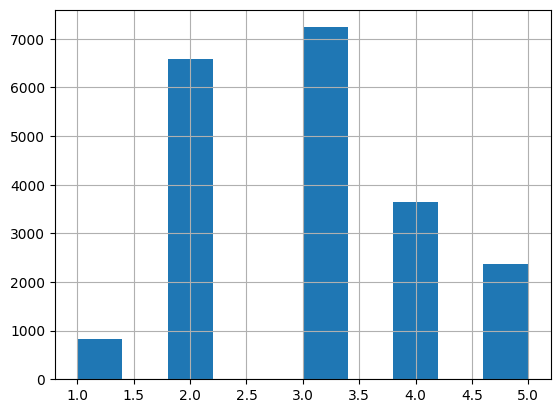

In [18]:
data["income_cat"].value_counts() # 計算"income_cat" 屬性中每個不同值的出現頻率
data["income_cat"].hist()

#### **Dataset -> Traing set and Testing set**

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

# 設定分割次數為 1 (n_splits=1)，測試集為資料集的 20% (test_size=0.2)，並設定隨機種子以確保結果可重複 (random_state=42)。
split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)
# 使用 split.split(data, data["income_cat"]) 進行分層隨機分割，用 for 迴圈得到訓練集的索引 (train_index) 和測試集的索引 (test_index)。
for train_index, test_index in split.split(data, data["income_cat"]):
    # 從原始資料集中得到相對應的訓練集和測試集資料
    strat_train_set = data.loc[train_index] 
    strat_test_set = data.loc[test_index]

In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [21]:
data["income_cat"].value_counts() / len(data)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

##### 比較 testing set 中 income 類別
觀察每個 Label 在 testing set 的分佈

建立原始樣本、分層抽樣與純隨機抽樣的分佈表格，並評估分層抽樣和隨機抽樣方法對收入分類比例估算的準確性。

In [22]:
# 計算每個收入類別在資料集的比例，也就是用每個類別的樣本數去除以總樣本數。
def income_cat_propotion(data):
    return data["income_cat"].value_counts() / len(data)

# 將資料集分為 train_set 和 test_set，其中 test_set 佔總體資料集的 20%。
train_set, test_set = train_test_split(data, test_size= 0.2, random_state= 42)

# 用 income_cat_propotion function 分別去計算整體資料集、分層抽樣測試集和隨機抽樣測試集的 income 分類比例
compare_props = pd.DataFrame({
    "Overall" : income_cat_propotion(data),
    "Stratified" : income_cat_propotion(strat_test_set),
    "Random" : income_cat_propotion(test_set)
}).sort_index()

# 計算分層抽樣和隨機抽樣對整體資料集的 income 比例的誤差
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props.round(4)

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.0398,0.0400,0.0402,0.9732,0.3650
2,0.3188,0.3188,0.3244,1.7323,-0.0152
3,0.3506,0.3505,0.3585,2.2664,-0.0138
4,0.1763,0.1764,0.1674,-5.0563,0.0275
5,0.1144,0.1143,0.1095,-4.3184,-0.0847


##### Let data is back to its original state
1. drop "income_cat" column
2. axis=1 表示刪除列，inplace=True 表示在原地修改資料集

In [23]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

## 🤖 **Discover and Visualize the Data to Insights**

> **Copy the training set**

- **避免修改原始數據**：在模型訓練的過程中，可能會對數據作修改、新增、刪除等動作，為了避免意外的數據修改，在進行任何操作之前，會對原始數據進行備份。

- **保證訓練的一致性**：訓練模型時會反覆調整不同的模型或參數，為了確保每次實驗使用的數據是一致的，會對資料進行備份。

In [24]:
housing = strat_train_set.copy()

> **使用 'matplotlib' 中的 'plot' 函數繪出房價、位置與人口的散佈圖，以加州的地理座標位置為基礎。**

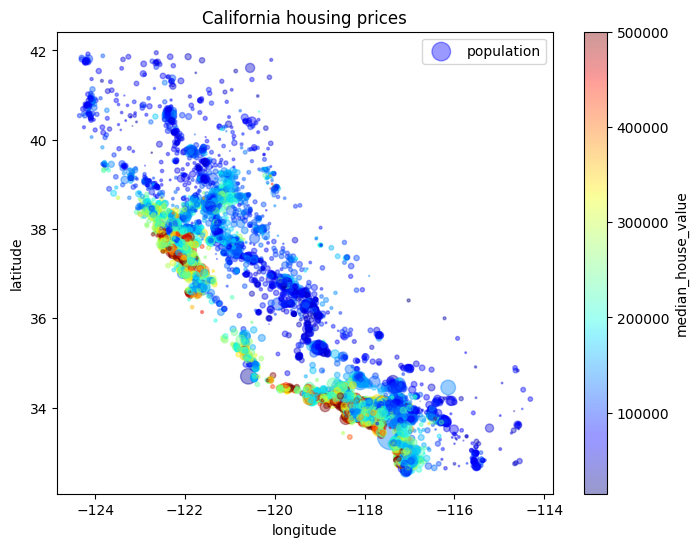

In [25]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, # alpha 設定點的透明度，可以觀察哪些地方重疊次數較多 (high-density areas)
             s = housing["population"] / 100, label = "population", figsize = (8,6),
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar =True, # 使用 "jet" 顏色去映射，值小時為藍色，值大時為紅色。
             sharex = False) # sharex = False 防止刻度共享，在有有多個子圖的情況下，它們的 x 軸將不會共用相同的刻度。
plt.title(label = "California housing prices")
plt.legend()

In [26]:
# Download the California image
images_path = os.path.join("datasets", "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)

url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))


('datasets/images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x11f1ad890>)

> **在地圖上用散佈圖，呈現不同區域的人口（= 點的大小）和房屋價格（= 點的顏色）**

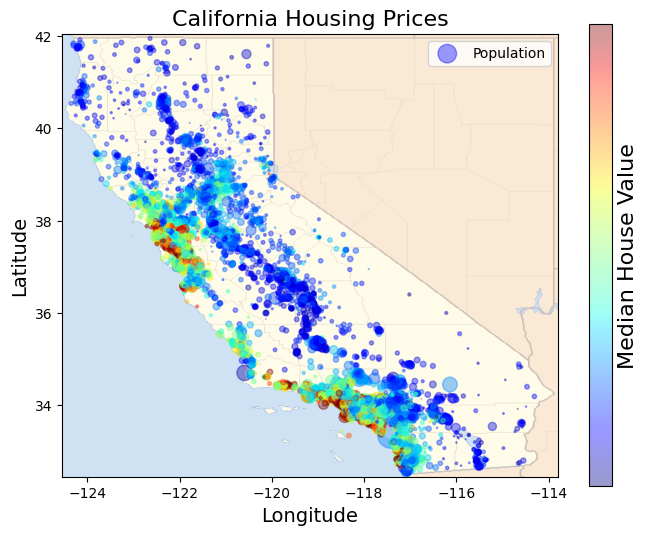

In [27]:
import matplotlib.image as mpimg

# Read the California image
california_img = mpimg.imread(os.path.join(images_path, filename))

# 繪製房地產數據地圖
fig, ax = plt.subplots(figsize=(8, 6))

# 資料散佈圖
scatter = ax.scatter(x = housing['longitude'], y = housing['latitude'],
                     s = housing['population']/100, c= housing['median_house_value'],
                     cmap = plt.get_cmap("jet"), alpha= 0.4, label = "Population")

# 加入地圖背景
ax.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
          cmap=plt.get_cmap("jet"))

# 設定標籤和標題
ax.set_ylabel("Latitude", fontsize= 14)
ax.set_xlabel("Longitude", fontsize= 14)
ax.set_title("California Housing Prices", fontsize=16)

# 設定顏色條
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(scatter, ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize= 10)
cbar.set_label('Median House Value', fontsize=16)

# 顯示圖例（在圖表中用來標示不同元素或類別的標籤）
ax.legend(fontsize= 10)

# 顯示圖表
plt.show()


> **房價與位置（海邊）和人口密度高度相關**

### 🚀 Looking for correlations 尋找關聯性

In [28]:
housing.info()
housing.drop("ocean_proximity", axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


> **Looking for relavance method 1：**
1. Look at how much each attribute `correlates` with the "median house value".

2.  使用 `corr()` 計算相關係數矩陣並與 "median_house_value"排序結果

In [29]:
corr_matrix = housing.corr() #計算 DataFrame 中的所有列的相關係數矩陣
corr_matrix["median_house_value"].sort_values(ascending=False) # ascending = False 代表降序排列

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

> **Looking for relavance method 2：**
1. 取得與 "median_house_value" 前四個是正相關的屬性

2. Use 'scatter_matrix' function 創建一個散佈矩陣

3. 畫出資料集中多個屬性之間的散佈圖矩陣，此 matrix 可以 `視覺化` 資料中不同屬性之間的相互關係。 

<Figure size 800x600 with 0 Axes>

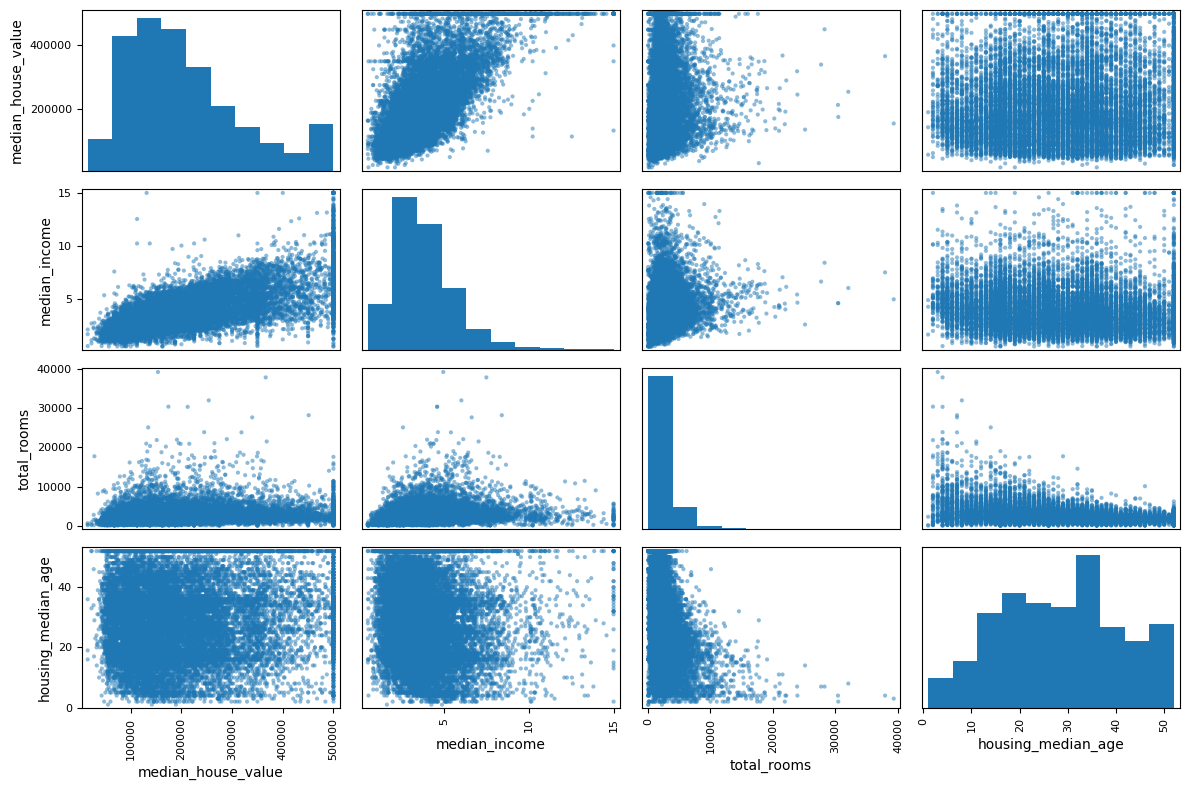

In [30]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
plt.figure(figsize=(8, 6))
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.tight_layout() #自動調整子圖或軸的排版，呈現出最佳的圖形尺寸
plt.show()

> **比較 median_income 與 median_house_value 屬性間的相關程度**

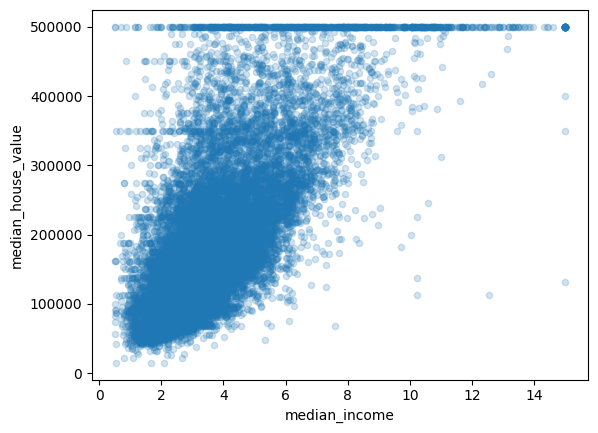

In [31]:
# Median income versus median house value
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.2)
plt.show()

> **Can be observed from the above figure：**
1. The correlation is indeed very strong.

2. We need to removing a few below ( 500k, 450k, 350k and 280k dollars). 

### **🚀 Experimenting with Attribute Combinations**

Now you may want to do before preparing the data for Machine Learning algorithms is to try out various attribute combinations.

1. **使用統計和視覺化工具**：去深入了解數據中各個特徵之間的關係

2. **特徵的組合**：試圖嘗試組合各種不同的屬性，去創造更多有用的新特徵，提高 Model 的準確率和性能。

3. **分析**：評估「新建立的特徵」與「目標變數」("median_house_value") 的相關性，並計算「新建立的特徵」其價值。

In [32]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

> **可以發現 "rooms_per_household" 的相關性比原始的特徵 ("total_rooms", "total_bedrooms") 高**

In [33]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## 🤖 **Prepare the Data for Machine Learning Algorithms**

> 在訓練機器學習模型時，通常會 `把特徵和目標變量區分開來`。
- housing 去掉了 "median_house_value" 目標變量的列，這樣 housing 中就只包含了特徵變量。

- housing_labels 只包含了目標變量 "median_house_value" 的列的數據。

In [34]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

### 🚀 **Data Cleaning 處理訓練集缺失資料**

> 查看訓練集各行是否存在空值

In [121]:
null_rows_idx = housing.isnull().any(axis=1)
print(null_rows_idx[null_rows_idx == True])

1606     True
10915    True
19150    True
4186     True
16885    True
         ... 
1350     True
4691     True
9149     True
16757    True
13336    True
Length: 158, dtype: bool


> 查看訓練集含有空值的行數

In [36]:
null_rows_idx.sum()

158

In [37]:
housing.loc[null_rows_idx].head() # loc -> 根據行或列的標籤選擇數據

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


> 丟掉相應的區域：刪除有缺失值的行，整個區域的數據被刪除

In [38]:
housing_option1 = housing.copy()
housing_option1.dropna(subset = ["total_bedrooms"], inplace=True) # Option 1
housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


> 丟掉整個屬性，會失去 "total_bedrooms" 這個特徵

In [39]:
housing_option2 = housing.copy()
housing_option2.drop("total_bedrooms", axis = 1, inplace=True) # Option 2
housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


> 利用特定的值（中位數）填充和替換缺失值，同時保留有缺失值的行並填上數值。

In [40]:
housing_option3 = housing.copy()

# 計算訓練集上的中位數
median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace = True) # Option 3

housing_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


#### **SimpleImputer**

- 是 scikit-learn 中用於處理缺失值的工具

- 可以用不同的策略對缺失值做填充

SimpleImputer 的 `strategy 參數` 可以設置為不同的值，以指定對缺失值的填充策略：
- **median**：使用特徵的中位數來填充缺失值

- **mean**：使用特徵的均值來填充缺失值

- **constant**：使用指定的常數值來填充缺失值

    - 指定 fill_value 參數： SimpleImputer(strategy="constant", fill_value=0)，這樣缺失值就會被填充為 0。

- **most_frequent**：使用最常見的特徵值來填充缺失值

⚠️ `fit() 與 transform()` 方法的比較：

- 前者只輸入數據不進行轉換，後者將輸入的數據進行轉換。

- transform() 進行在 fit() 的基礎上

⚠️ 在 SimpleImputer 中使用 `fit_transform()` 方法：
- SimpleImputer 是一個轉換器

- fit_transform 方法可以擬合數據和進行轉換


> 對數據進行缺失值的填充，確保模型不會因為缺失值而出現錯誤，並儲存 `每個特徵的中位數(Median)`。

In [41]:
from sklearn.impute import SimpleImputer
# 將每個屬性的缺失值替換為該屬性的中位數
imputer = SimpleImputer(strategy= "median")

In [42]:
# 刪除 "ocean_proximity" 行，確保 housing_num 只包含數字資料
housing_num = housing.drop("ocean_proximity", axis = 1)
# 訓練集中的數值去擬和每個特徵的中位數
imputer.fit(housing_num)

SimpleImputer(strategy='median')

> 每個特徵的中位數（不包含"ocean_proximity"）會儲存在 statistics_  array 中

In [43]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [44]:
x = imputer.transform(housing_num) # MatrixLike -> 涵蓋許多數據結構的變數（Numpy, DataFrame, spareMatrix...）
# 將 x 結果放回 DataFrame 中
housing_tr = pd.DataFrame(x, index=housing_num.index, columns= housing_num.columns)
housing_tr[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [45]:
housing_num.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580


### 🚀 **Handling Text and Categorical Attributes**

> 先前都在處理數字屬性（float64），但在 housing 資料集中有一個**文字屬性（object）**-> "ocean_proximity"

In [46]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


#### 💡 **Numpy array**

> "ocean_proximity" 底下的值非任意文字，其可能的值有限，每個值代表一個類別(object)。

> 使用Scikit-Learn的OrdinalEncoder類(Numpy array)，可以將此類別的「**文字轉換為數字**」，讓機器可以更好讀取。

In [47]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

Get category list

In [48]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### 💡 **Sparse matrix**

> 可以觀察到 "housing_cat_1hot" 為一稀疏矩陣，而不是 Numpy 陣列：

1. 稀疏矩陣： 稀疏矩陣使用一種壓縮的形式，僅儲存非零元素的值或位置，包括 COO（坐標）、CSR（壓縮行）、CSC（壓縮列）。

2. Numpy 陣列： Numpy 陣列以密集（dense）的形式存儲，即所有元素都有固定的位置。

➞ 總結來說，稀疏矩陣主要用於處理「數據中包含大量零值」的情況，以減少記憶體使用；Numpy 陣列則是一種通用的多維數組結構，對於「密集的數據」表示非常有效。

##### ⭐️ **OneHotEncoder**

> One-hot encoding 是一種將類別型變數轉換為二進制表示的方法，並且只有其中一個特徵的值為 1，其餘特徵的值均為 0。
1. 每個類別變數的每個唯一值都將被映射到一個新的二進制特徵。

2. 對於每個樣本，僅有屬於其原始類別的二進制特徵的值為 1，其餘特徵的值均為 0。

> 在 training set 使用 "fit_transform()" 方法，需要先「適應」OneHotEncoder 對 training data。
1. 檢測類別變數的唯一值，為每個唯一值分配一個新的二進制特徵（0 or 1）。

2. 將training data 轉換成新的二進制特徵

3. 這樣模型就能夠理解這些特徵，OneHotEncoder 也學到了轉換規則。

In [49]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [50]:
housing_cat_1hot.toarray() # Sparse matrix -> Numpy array

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

設定 sparse = False -> "fit_transform()"方法直接返回一個密集 NumPy Array

In [51]:
cat_encoder_1 = OneHotEncoder(sparse_output = False)
housing_cat_1hot = cat_encoder_1.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Use OneHotEncoder kit to list categories

In [52]:
cat_encoder_1.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

> Pandas has a function called "get_dummies()" 
1. 數據包含類別變數（顏色、天氣、地區等）且變數為「字串形式」，機器學習模型可能需要「數值形式」的 input。

2. 每個類別可以成為新的二進制特徵列，其值為 0 或 1。

3. 將 "ocean_proximity" 列中的類別變數轉換以二進制表示，將結果合併回原始 DataFrame。

In [53]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY", 'NEAR OCEAN']})
result = pd.get_dummies(df_test) # 使用 get_dummies() 將類別變數進行 one-hot 編碼
print(result)

   ocean_proximity_INLAND  ocean_proximity_NEAR BAY  \
0                    True                     False   
1                   False                      True   
2                   False                     False   

   ocean_proximity_NEAR OCEAN  
0                       False  
1                       False  
2                        True  


> 在測試集或其他新數據上使用 "transform()"，表示使用之前已經「適應」過的 OneHotEncoder 的轉換規則來對新資料進行轉換。
1. fit_transform() 用於學習和轉換訓練數據
2. transform() 是使用之前學到的轉換規則來轉換新的數據（可以應用在未知數據）

In [54]:
cat_encoder_1.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Feed get_dummies() a DataFrame containing an unknown category (e.g., "<2H OCEAN")

In [55]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


處理未知類別 "<2H OCEAN"，OneHotEncoder 能夠檢測未知類別並提出異常。

In [56]:
cat_encoder_1.handle_unknown = "ignore" 
cat_encoder_1.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [57]:
cat_encoder_1.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [58]:
cat_encoder_1.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [59]:
df_output = pd.DataFrame(cat_encoder_1.transform(df_test_unknown),
                         columns = cat_encoder_1.get_feature_names_out(),
                         index = df_test_unknown.index)
print(df_output)

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     1.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       0.0                         0.0  
1                       0.0                         0.0  


### 🚀 **Feature Scaling and Transformation**

- 在處理數據時，有的時候數值特徵的大小差異很大，這可能會影響到模型的表現，因為模型可能會「**偏向**」關注值較大的特徵。
- 與所有轉換一樣，重要的是將縮放器只適合訓練資料，而不是整個資料集（包括測試集）。

- 使用 `特徵縮放`，目的是將所有特徵的數值 `調整到相同的尺度`：
    1. **Min-max scaling**：將所有特徵的值縮放到一個指定的範圍內，通常在 0 到 1 之間。
    2. **Standardization**：將特徵的值轉換為標準常態分佈(normal distribution)，使它們的平均值為 0，標準差為 1。 

> fit() or fit_transform() only use for the `training set`.

> If you have a **trained scaler**, you can use **it** to transform() any other set, including testing set, validation set and new data. 

➞ Trained scaler 指的是「已經」使用特定資料集進行適應(fit)的特徵縮器）

#### **1. Min-max scaling (Normalization)**

1. 對每個屬性，值會被移動並重新縮放，讓它們最終介於 0 到 1 之間。

2. **透過減去最小值並除以最大值減去最小值**


Scikit-Learn provides a transformer called "MinMaxScaler"

`It has a "feature_range" hyperparameter（超參數）`

In [60]:
from sklearn.preprocessing import MinMaxScaler

min_max_scalar = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scalar.fit_transform(housing_num) # housing_num 是純數值訓練集

#### **2. Standardization**
1. **減去平均值**：將每個數值減去訓練集的平均值，這樣標準化後的平均值就會變成零。

2. **除以標準差**：將結果除以訓練集的標準差，這樣標準化後的標準差就會變成 1。

3. 標準化不會將值設立到特定範圍，這對一些 ML 演算法來說可能是一個問題（例如，神經網路通常期望輸入值從0到1不等）

**稀疏矩陣（Sparse Matrix）的處理**

1. 稀疏矩陣中有很多零值，如果直接使用標準的特徵縮放方式可能會破壞矩陣的稀疏結構。

2. `StandardScaler(with_mean = Fasle)`使用 StandardScalar 用於標準化，並將其超參數設為False。

3. 這樣代表資料在進行除法時只使用標準差，而不會減掉平均值，可以保留稀疏矩陣中的零值。

In [61]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

#### **Input Feature’s distribution（輸入特徵）**
輸入特徵是用來訓練機器學習模型的數據的屬性

當 input feature 數據分佈是 heavy tail or deviation from normal distribution 時：

1.  Heavy tail 處理重尾分布

2. Multimodal distribution 多峰分佈處理

##### **1. Heavy tail 處理重尾分布**

大多數值都集中在一個小範圍內，可以先對特徵進行轉換，縮小重尾的影響。

用平方根或將特徵提升到0到1之間的某個冪次方，或者對數(log)變換。

1. 將資料集特徵換算為平方根

In [62]:
housing["population"].apply(np.sqrt)

12655    47.296934
15502    44.888751
2908     25.826343
14053    29.966648
20496    42.860238
           ...    
15174    45.011110
12661    69.057947
19263    21.400935
19140    34.756294
19773    25.000000
Name: population, Length: 16512, dtype: float64

2. 幂律分佈換算為 log

In [63]:
housing["population"].apply(np.log)

12655    7.712891
15502    7.608374
2908     6.502790
14053    6.800170
20496    7.515889
           ...   
15174    7.613819
12661    8.469892
19263    6.126869
19140    7.096721
19773    6.437752
Name: population, Length: 16512, dtype: float64

> **分桶（Bucketizing）**

將其分為大致相等大小的桶（區間），然後將每個特徵值替換為其所屬`桶的index`。

這創建了一個`接近均勻分佈`的特徵，就不需要更進一步的縮放。

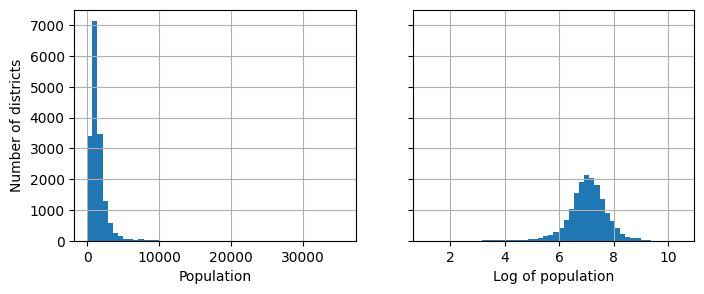

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

##### **2. Multimodal distribution 處理多峰分佈**
1. **分桶（Bucketizing）**：將其分為大致相等大小的桶，然後把每個類別替換為其所屬 `桶的index` 而不是數值。使用 OneHotencoder

2. **相似的類別特徵**：對於多峰分佈，還可以添加表示特定峰值相似性的特徵。使用 `徑向基函數（RBF）` 計算相似性。

    ( 輸出值會隨著輸入值遠離固定點而呈指數級別遞減 )

In [65]:
from sklearn.metrics.pairwise import rbf_kernel

# 測量屋齡中位數與 35 之間的相似性
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma = 0.1)

> **捕捉房屋年齡中位數與特定年齡值之間的相似性**

使用 `RBF kernel` 來計算特徵間的相似性。存在多峰分佈中的峰值，新的特徵在房屋年齡中位數為 35 時達到峰值，此圖可以了解該特定年齡範圍是否與較低價格相關聯。

1. 較小的 gamma 值導致相似性的影響範圍變大。這意味著更遠的數據點對相似性的貢獻也比較大，Kernel 的形狀較為平緩。

2. 較大的 gamma 值導致相似性的影響範圍變小。這意味著只有較近的數據點對相似性的貢獻較大，Kernel 的形狀較為尖峭。

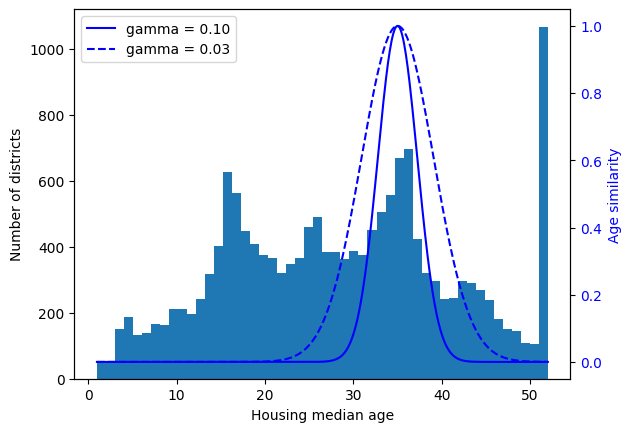

In [66]:
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma = gamma1) # gamma 控制了 RBF kernel 的形狀
rbf2 = rbf_kernel(ages, [[35]], gamma = gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins = 50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

#### **Target Values（目標變數）**

目標變數是在監督學習中，我們希望模型預測或分類的數值或標籤。

當目標變數的分佈為 heavy tail or heavy tail or deviation from normal distribution 時：

1. 直接轉換目標變數

2. 使用 TransformedTargetRegressor 簡化轉換

**1. 直接轉換目標變數**

- 對目標變數的轉換和還原過程較為明確，能夠更靈活地處理。

- 可以 `手動控制` 轉換的過程，根據需求調整轉換器的參數。

In [67]:
from sklearn.linear_model import LinearRegression

# 直接使用 StandardScaler 進行目標變數的縮放
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

# 使用線性回歸模型擬合(fit)縮放後的目標變數
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)

# 當需要進行預測時，模型會呼叫回歸模型的 predict() 方法
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data
scaled_predictions = model.predict(some_new_data)

# 使用 transformer 的 inverse_transform() 方法還原預測值的縮放
predictions = target_scaler.inverse_transform(scaled_predictions)
print(predictions)

[[135958.75805364]
 [309735.008975  ]
 [165232.3998617 ]
 [138162.41971241]
 [232903.1766333 ]]


**2. 使用 TransformedTargetRegressor 簡化轉換**

- 在預測階段可以方便的處理轉換前後的數據

- 在模型擬合和預測過程中，自動處理目標變數的轉換和還原

- TransformedTargetRegressor 會 **自動使用 transformer** 對目標變數進行縮放，然後 `使用縮放後的目標變數` 訓練回歸模型。

In [123]:
from sklearn.compose import TransformedTargetRegressor

# 給定兩個參數 '線性回歸模型' 和 '目標變數的 transformer' 結核並進行目標變數轉換
model = TransformedTargetRegressor(LinearRegression(), transformer = StandardScaler())

# 用原始目標變數進行模型擬合，它會「自動處理」目標變數的縮放。
model.fit(housing[["median_income"]], housing_labels)

# 使用模型預測新數據
predictions = model.predict(some_new_data)
print(predictions)

[135958.75805364 309735.008975   165232.3998617  138162.41971241
 232903.1766333 ]


### 🚀 **Customer Transformers**

**Create a customer transformer ➡︎ 改善特徵的分佈，使其更趨近於 `常態分佈(normal distribution)`，因為模型處理常態分佈的表現較好。**

Scikit-Learn 中提供許多有用的轉換器，在一些情況下，需要撰寫自己的 Transformer 來執行自定義的轉換、清理操作或結合特定屬性。

⭐️ Transform contains 對數轉換、方根轉換 ➡︎ 使特徵更接近常態分佈

#### **使用 FunctionTransformer 創建不同的轉換器**
從對數轉換到計算高斯 RBF 相似度，以及組合特徵的例子，可以在 Scikit-Learn Pipeline 中使用，以應用相同的轉換邏輯。

> 對某個特徵（這裡是人口數）進行對數轉換

In [69]:
from sklearn.preprocessing import FunctionTransformer

# 使用 NumPy 的對數函數和指數函數 create 一個對數轉換器
log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(housing[["population"]])

> 創建高斯RBF相似度轉換器

In [70]:
# 計算與之前相同的 RBF -> 建立測量屋齡中位數與 35 之間的相似性的 transformer
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args = dict(Y = [[35.]], gamma = 0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

> 創建地理位置相似度轉換器

- RBF Kernel 是非線性函數，是計算在某個固定點到其他點的距離上的有兩個相似度值。
- 在一個距離上 **存在兩個相應的輸出值**，因此 `不存在單一的逆函數`，無法將輸出值準確還原為原始輸入。

- 在計算相似度時，不區分輸入中的特徵。如果有一個多個特徵的陣列，它會使用 `歐氏距離（2D距離）`來計算和衡量相似度（精準度降低）。

In [71]:
sf_coords = 37.7749, -122.41 # sf_coords 存放舊金山的經緯度
# 使用rbf_kernel函數作為轉換函數, kw_args參數 -> 用來傳遞附加的參數給rbf_kernel函數，包含固定點的坐標 'Y'（即舊金山的坐標）、gamma值。
sf_transformer = FunctionTransformer(rbf_kernel, kw_args = dict(Y = [sf_coords], gamma = 0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

> 創建一個可以計算輸入特徵的比例的轉換器

- 目的是使用 Customer transformer 來創造新的特徵，此特徵是原始特徵之間的比例，可能可以讓模型更好地捕捉特徵之間的關係。

In [72]:
# 使用 lambda function 計算了輸入陣列中第一列和第二列之間的比例
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
# 將包含兩行兩列的陣列，應用在 ratio_transformer 這個轉換器上
result = ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))
print(result)

[[0.5 ]
 [0.75]]


> **Framework**

In [73]:
from sklearn.base import BaseEstimator, TransformerMixin

class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass  # no hyperparameters to tune
    
    def fit(self, X, y = None): # fit() 通常用於執行必要的初始化
        return self  # always return self
    
    def transform(self, X): # transform() 執行對數轉換
        return np.log1p(X)  # log-transform the input array

- sklearn.utils.validation 軟體包包含幾個可用於驗證輸入的函式。

- 在 fit() 方法中設定 n_features_in_，確保傳遞給 transform() 或 predict() 的資料具有這個數量的特徵。

- 所有 estimators 在**傳遞** DataFrame 時，都應在 fit() 方法中設定 `'feature_names_in_'`。

- 當 **transformer 可以逆轉**時，都應該提供 aget `'get_feature_names_out'` 方法，以及 `'aninverseinverse_transform'` 方法。

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y = None): # y is required even through we don't use it !!
        X = check_array(X) # check x  is whether not infinte float values.
        self.mean_ = X.mean(axis = 0)
        self.scale_ = X.std(axis = 0)
        self.n_features_in_ = X.shape[1] # every estimator stores this in fit()
        return self

    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1] # promise self.n_features_in_ and X equal to number of feature.
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

> **Customer transformer can use other estimators**

- 可以從 sklearn.utils.estimator_checks 中將 instance 傳給 check_estimator() 來檢查自定義 estimators 是否尊重Scikit-Learn的API。

In [75]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
        
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self
    
    def  transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma= self.gamma) # 使用 RBF 計算每個樣本與 clusters 的相似程度
    
    def get_feature_names_out(self, names = None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)] # 回傳每個特徵名稱，每個名稱都代表一個相似度

In [76]:
cluster_simil = ClusterSimilarity(n_clusters= 10, gamma= 1., random_state= 42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight = housing_labels)

In [77]:
similarities[:3].round(2)

array([[0.  , 0.31, 0.  , 0.85, 0.  , 0.  , 0.  , 0.  , 0.16, 0.49],
       [0.11, 0.  , 0.  , 0.  , 0.94, 0.  , 0.  , 0.41, 0.  , 0.  ],
       [0.11, 0.  , 0.15, 0.  , 0.  , 0.37, 0.  , 0.02, 0.  , 0.  ]])

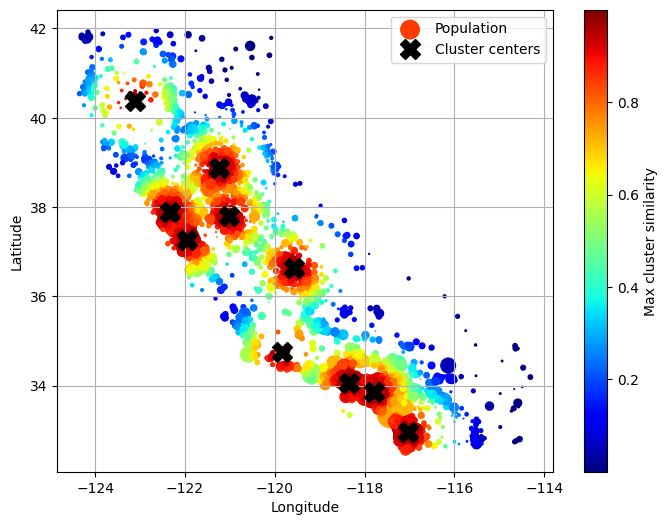

In [78]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis = 1)

housing_renamed.plot(kind = "scatter", x = "Longitude", y = "Latitude", grid = True,
                     s = housing_renamed["Population"] / 100, label = "Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(8, 6))

plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle = "", color = "black", marker = "X", markersize = 15, label = "Cluster centers")
plt.legend(loc = "upper right")
plt.show()

### 🚀 **Transformation Pipelines**

- **A machine learning pipeline is used to help automate machine learning workflow.**

- **ML pipelines are pipelines are iterative as every step is repeated to `continuously improve the accuracy` of the model and achieve a successful algorithm.** 

#### **Simple operation of pipeline**

- Pipeline 每個步驟的 **轉換器**（transformer）都應具備 `fit_transform() 方法` 
    - 因為在 Pipeline 中的每個步驟，都需要進行一些資料轉換。

- Pipeline 最後一個步驟可以是 `任何類型` 的估計器（也可是轉換器）
    - 因為在一個Pipeline中，最後一個步驟可能是一個預測模型，或者其他不需要進行轉換的估計器。

1. 利用 scikit-learn 的 Pipeline 建立 Pipeline()

2. 建立名為 "num_pipleline" `處理數值型特徵`（填補缺失值，然後對這些特徵進行標準化）為包含兩個步驟的 Pipeline：

    - **impute** 步驟：使用 SimpleImputer 這個轉換器（transformer），將缺失值使用中位數進行填充。
    
    - **standardize** 步驟：使用 StandardScaler 這個轉換器，對特徵進行標準化（均值為0、平方差為1的標準常態分佈）。

In [79]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

> **如果不想為每個 step & transformers 命名，則使用 `make_pipeline()` 方法。**

In [80]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

> **Scikit-Learn estimater 會呈現一互動式圖表，視覺化 Pipeline 流程。** 

In [81]:
from sklearn import set_config

set_config(display="diagram")

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

- 調用 Pipeline 的 fit() 方法時，會按順序在所有轉換器上依次調用 fit_transform()。

- 將每個調用的輸出作為參數，傳遞給下一個調用，直到傳到最終的估計器（estimator）。

- 對於**最終的估計器**，它 `僅調用 fit() 方法`。

In [82]:
housing_num_prepared = num_pipeline.fit_transform(housing_num) # housing_num 是純數值訓練集
housing_num_prepared[:2].round(2) #輸出前兩行，並四捨五入取到小數點後兩位

array([[-0.94,  1.35,  0.03,  0.58,  0.64,  0.73,  0.56, -0.89],
       [ 1.17, -1.19, -1.72,  1.26,  0.78,  0.53,  0.72,  1.29]])

> **將 Pipeline 處理數值類型特徵數據轉換為 DataFrame**
- **可視化分析**：DataFrame 可以更容易使用 matplotlib 或 seaborn 等函式庫繪製直方圖、散佈圖等圖表，觀察數據的分佈與關聯性。

- **對比原始數據**：將處理後的數據轉換為 DataFrame 可以更容易得比對與原始數據的差異

- **方便後續操作**：後面的模型訓練、特徵選擇等操作，通常需要使用 DataFrame 或類似的數據結構。

In [83]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns= num_pipeline.get_feature_names_out(), index= housing_num.index)

df_housing_num_prepared.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168


#### **檢查、獲取和修改 Pipeline 的結構和參數**

> **.steps：列出 Pipeline 中的步驟**

In [84]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

> **回傳 Pipeline 中索引為 1 的步驟**

In [85]:
num_pipeline[1]

StandardScaler()

> **回傳 Pipeline 中最後一個步驟「以前」的 SubPipeline**

In [86]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

> **.named_steps[""]：根據名稱查詢 Pipeline 中的「指定步驟」並回傳**

In [87]:
num_pipeline.named_steps["standardscaler"] #因為是使用 'make_pipeline' 幫我們生成每個步驟的名稱

StandardScaler()

> **.set_params()：動態調整 Pipeline 步驟中參數的方法(不需重新建立整個 Pipeline)**
1. 設置步驟的超參數

2. 使用雙底線 __ 來指定步驟的名稱和超參數的名稱

In [88]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

#### **建立專案的 Pipeline**

> **使用 "ColumnTransformer" 轉換器**
- 主要應對具有多種數值和類別特徵的數據集

- 可以用於將不同的轉換，應用於數據的不同部分。

> 根據指定的名稱分別把對應的轉換器應用到不同的特徵集上
1. 建立兩個陣列分別放入數值型和文字型特徵

2. 利用已建立的處理數值型特徵之 Pipeline

3. 建立一處理文字轉數值型特徵之 Pipeline

4. 建立一自定義的轉換器 preprocessing 的 ColumnTransformer 物件，分別將數值特徵集應用於 num_pipeline，將分類特徵集應用於 cat_pipeline。 

In [89]:
from sklearn.compose import ColumnTransformer

num_attribute = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
cat_attribute = ["ocean_proximity"]

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                             OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
      ("num", num_pipeline, num_attribute),
    ("cat", cat_pipeline, cat_attribute),])

> **使用 "make_column_transformer" 和 "make_column_selector"**
- "make_column_transformer" 可以根據特徵的資料類型（數值型或類別型），指定不同的轉換步驟。

- "make_column_selector" 是讓你能夠從資料類型中，輕鬆地從 DataFrame 中選擇想要的列。

- 其中 "dtype_include" 和 "dtype_exclude" 允許根據數據類型來選擇或排除特徵列

In [90]:
from sklearn.compose import make_column_transformer, make_column_selector

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)), # 當 DataFrame 中某一列的數據類型是數字（例如整數或浮點數），這列就會被選中！
    (cat_pipeline, make_column_selector(dtype_include=object)), # 當 DataFrame 中某一列的數據類型是文字（例如字符串）或其他對象，這列就會被選中！
)

> 將原有 housing 訓練集進行預處理 Pipeline
1. **數值型特徵 (num_attribute) 的處理**：使用 num_pipeline 進行數值型特徵的填充缺失值（使用中位數），並進行標準化（使用標準差標準化）。

2. **類別型特徵 (cat_attribute) 的處理**：使用 cat_pipeline 進行類別型特徵的填充缺失值（使用眾數）和 One-Hot Encoding。

3. ColumnTransformer 將這兩個 transformer 對應到符合的特徵列，並將整個資料集轉換成預處理後的形式。

In [91]:
housing_prepared = preprocessing.fit_transform(housing)

> 將經過預處理的訓練集 housing_prepared 轉換為 DataFrame 格式

In [92]:
housing_prepared_fr = pd.DataFrame(housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index)
housing_prepared_fr.head(2)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
12655,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
15502,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0


In [93]:
housing_prepared_fr.shape

(16512, 13)

In [94]:
preprocessing.get_feature_names_out()

array(['pipeline-1__longitude', 'pipeline-1__latitude',
       'pipeline-1__housing_median_age', 'pipeline-1__total_rooms',
       'pipeline-1__total_bedrooms', 'pipeline-1__population',
       'pipeline-1__households', 'pipeline-1__median_income',
       'pipeline-2__ocean_proximity_<1H OCEAN',
       'pipeline-2__ocean_proximity_INLAND',
       'pipeline-2__ocean_proximity_ISLAND',
       'pipeline-2__ocean_proximity_NEAR BAY',
       'pipeline-2__ocean_proximity_NEAR OCEAN'], dtype=object)

> Review to build the pipeline

In [95]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [96]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [97]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## 🤖 **Select and Train a Model**

### **🚀 Training and Evaluating on the Training Set**

#### 1. **Linear Regression**

在一堆數據中，希望 `找到一條直線`，這條直線能夠最好地去擬合這些數據 ➡ 這條直線的方程式就是線性回歸模型

> 建立線性回歸模型（之後可以利用此模型進行預測）

In [98]:
from sklearn.linear_model import LinearRegression

linear_regression = make_pipeline(preprocessing, LinearRegression()) # 建立一個包含數據預處理的 Transformer 和線性回歸模型的 Pipeline
linear_regression.fit(housing, housing_labels) # 將模型擬合到訓練數據上 -> housing= 包含特徵特徵的 DataFrame, housing_labels= 目標變量（房價中位數）

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x164...
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16ac8cf10>)])),
                ('linearregression', LinearRegression())])

> 線性回歸模型對前五個樣本的預測結果為：

In [99]:
housing_predictions = linear_regression.predict(housing)
housing_predictions[:5].round(-2)

array([ 70700., 288100., 186100., 189600., 270700.])

> Compare against the actual values：

- 可以看到，模型的預測與實際值有一些偏差
- 通常會使用不同的指標（例如均方根誤差，R平方等）來評估模型的性能。

In [100]:
housing_labels.iloc[:5].values

array([ 72100., 279600.,  82700., 112500., 238300.])

> 計算預測值和實際值之間的誤差比例：


In [101]:
# 如果誤差比率為 0.1，表示預測值比實際值多了 10%；如果誤差比率為 -0.1，表示預測值比實際值少了 10%。
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1 
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios])) # join 是把將字符串列表中的元素用指定的分隔符號連接起來

-1.9%, 3.0%, 125.0%, 68.5%, 13.6%


> 計算線性回歸模型的均方根誤差(RMSE)：

- RMSE 是衡量模型預測誤差的常見指標
- 是計算預測值和實際值之間的平方誤差的平均值，然後取平方根。

In [102]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared= False)
lin_rmse

69239.92621715792

#### 2. **Decision Tree Regressor**

想像有一堆問題，每一個問題都是基於某個特徵的值。通過回答這些問題 ➡︎ 最終可以得到一個結論或預測

In [103]:
from sklearn.tree import DecisionTreeRegressor

tree_regression = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_regression.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x164...
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16ac8cf10>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

> 利用決策數模型對訓練集的數據進行預測

In [104]:
housing_predictions = tree_regression.predict(housing)

> 計算線性回歸模型的均方根誤差(RMSE)：
- 可以發現計算出來的誤差為零，可能會有過度擬和的的情況發生。

- 接下來，將訓練集拆一部分作為 model validation 使用。

In [105]:
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_rmse

0.0

### **🚀 Better Evaluation Using Cross-Validation (交叉驗證)**

#### **train_​test_split() 方法**


將訓練集拆分為較小的訓練集和驗證集，然後根據較小的訓練集訓練模型，並對照驗證集評估效能。

⚠️ **k-fold 交叉驗證概念**
- k-fold 交叉驗證是一種模型評估的方法

- 將訓練集分為 k 個非重疊的子集（稱為折），然後進行 k 輪訓練和驗證。

- 每一輪，模型在其中一個折上進行驗證，並在其他 k-1 折上進行訓練。

- 這樣的過程重複 k 次，每一次使用不同的折進行測試，每一個折都有機會成為驗證集，最終得到 k 個評估分數。

- 最後，計算這 k 個評估分數的平均值，再用評估指標去衡量模型預測和實際觀測之間的差異。

> 程式碼解析
1. 導入 Scikit-Learn 中的 cross_val_score 方法，執行 k-fold 交叉驗證。

2. **-cross_val_score(...)**：加上負號是為了將成本函數轉換為效用函數

3. **scoring="neg_root_mean_squared_error"**：使用 `負的均方根誤差`（Negative Root Mean Squared Error）作為評估指標
    - cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better)

    - the scoring utility function is actually `the opposite of the RMSE`

4. tree_rmses：用陣列儲存了 10 次交叉驗證中，每一次的負均方根誤差分數。

In [108]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_regression, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10) #使用10-fold交叉驗證

> 比較決策樹與線性回歸模型的效能表現
- 決策樹的RMSE表現比線性迴歸模型平均RMSE略好

- 決策樹可能由於過度擬合，導致差異很小。

- 也因為訓練誤差很低（實際上為零），導致驗證誤差很高。

In [109]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     67430.987159
std       3623.038287
min      62118.730843
25%      64487.233745
50%      67826.258425
75%      69227.770860
max      74127.491554
dtype: float64

In [110]:
lin_rmses = -cross_val_score(linear_regression, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     71683.341192
std       7859.781076
min      65132.889557
25%      68524.959332
50%      69774.736205
75%      71193.103459
max      93021.016203
dtype: float64

#### **Random Forest Regressor**

> 就是進階版的決策樹，所謂的森林就是由很多棵決策樹所組成

1. 從訓練集中抽取 n’ 筆資料出來

2. n’ 筆資料隨機挑選 k 個特徵做樣本

3. 重複 m 次，產生 m 棵決策樹

4. 分類：多數投票機制進行預測；迴歸：平均機制進行預測

⚠️ 在這裡 Random Forest Regressor 的超參數是使用預設值，並未進行手動調整。

In [111]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_regressor, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [112]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47328.782275
std       2456.436091
min      43953.861521
25%      45272.501522
50%      47431.774424
75%      49045.891146
max      51153.378784
dtype: float64

In [113]:
forest_regressor.fit(housing, housing_labels)
forest_housing_predictions = forest_regressor.predict(housing)

In [115]:
forest_rmse = mean_squared_error(housing_labels, forest_housing_predictions, squared=False)
forest_rmse

17611.944346777196

## 🤖 **Fine-Tune Your Model**

Fine-tuning 模型的目的是進一步調整 `已經訓練過` 的模型，讓它更好地去適應特定的任務或數據。

### 🚀 **Grid Search**

**超參數 (hyperparameters)**
1. 是在訓練模型之前需要 `手動調整` 的參數，而不同的超參數，訓練出來的模型也不相同。
2. 手動調整超參數的一種方法是逐一嘗試不同的值，直到找到「最佳組合」最大程度地提高模型的性能。
3. 超參數調整方法可以分為窮舉法（Grid Search）、隨機搜尋法（Random Search）

**網格搜尋 (Grid Search)**：是一種自動化的超參數調整方法
1. 它通過「指定」超參數的可能取值範圍，對這些值的 `所有組合` 進行訓練。
2. 最後根據模型驗證集結果，選擇出表現最好的超參數組合。

> 透過網格搜索方法，找到最佳的超參數組合，提高模型的性能，並使用了 Pipeline 來整合預處理和模型訓練的步驟。

In [116]:
from sklearn.model_selection import GridSearchCV

# "full_pipeline" 是待調參的模型，這裡包含了預處理和隨機森林回歸器的 Pipeline
full_pipeline = Pipeline([("preprocessing", preprocessing),
                          ("random_forest", RandomForestRegressor(random_state=42)),])

# 定義超參數的不同組合，包含了兩個字典，每個字典代表一個不同的超參數組合。
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
# 初始化 GridSearchCV 參數
grid_search = GridSearchCV(full_pipeline, param_grid= param_grid, cv= 3, scoring= 'neg_root_mean_squared_error')
# 進行網格搜索，對所有超參數組合進行模型訓練和評估。
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x16ac8cf10>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

> **full_pipeline.get_params().keys()**
-  用來查看 full_pipeline 中的`所有參數名稱`（包括預處理的超參數和隨機森林回歸器的超參數）
-  可以確認模型中的可調整參數以及進行超參數調整

In [119]:
print(str(full_pipeline.get_params().keys())[:1000] + "...") # 只只印出字串的前1000個字元

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'prepr

> **best_params_**

- 獲取最佳超參數的組合
- 這個屬性包含一個字典，其中的鍵（keys）是超參數的名稱，而對應的值（values）是找到的最佳超參數值。 


> 觀察最佳超參數組合

- **max_features=6**
    1. 每棵樹在進行分割時只考慮其中的 6 個特徵，而不是全部的特徵。
    2. 一種降低相關性、增加模型多樣性的策略，並減少過度擬和的風險。

- **preprocessing__geo__n_clusters=15**
    1. 在地理資料的預處理步驟中，使用 k-means 或其他群集算法，將地理位置分為 15 個群集。
    2. 群集處理是一種將原始特徵進行轉換或切分的特徵工程方法，把地理資料轉換成更有結構性的新特徵，模型可以使用這些新特徵更好地捕捉地理資料的模式。

In [118]:
best_params = grid_search.best_params_
print(best_params)

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}


> 查看最佳估計器的完整組成

1. 網格搜索中找到的最佳估計器，具有最佳超參數配置的模型
2. Pipeline 包括預處理步驟和最佳超參數配置的模型

In [120]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x16466fc...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x14f8954d0>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [126]:
cv_res = pd.DataFrame(grid_search.cv_results_)

# 根據平均測試分數排序
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# 選取有興趣的列
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]

# 定義每一列的名稱
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols

# 將測試分數取負值，並四捨五入轉換成整數
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43400,44475,45021,44299
13,15,8,43662,44478,45495,44545
14,15,10,44231,45167,46182,45193
7,10,6,44437,45257,46452,45382
9,10,6,44437,45257,46452,45382


### 🚀 **Randomized Search**

**隨機搜索（Randomized Search）**：是一種超參數調整的方法
1. 在超參數搜索空間中隨機選擇組合進行評估，而不是嘗試所有可能的組合。
2. 適用於超參數搜索空間較大的情況
3. 不需要事先指定所有可能的超參數組合，而是 `指定迭代次數`。
4. 只會評估固定數量的隨機組合，通常會比窮舉法更有效率。

**Grid Search verse Randomized Search**

1. 對於 `連續超參數`（或是離散的但可能值很多的情況）：

    隨機搜索在每次迭代中都會探索不同的值，而不僅僅是網格搜索列出的那幾個值。
2. 有 `多個超參數` 需要探索時，每個超參數都有多個可能的值：

    **網格搜索**可能需要大量訓練模型的次數；**隨機搜索**可以根據選擇的迭代次數運行


In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [127]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {"preprocessing__geo__n_clusters": randint(low=3, high=50),
                  "random_forest__max_features": randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x16ac8cf10>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14a56bbd0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14a439bd0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [128]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols

cv_res[score_cols] = -cv_res[score_cols].round().astype("Int64")
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41482,42969,43230,42560
8,32,7,41890,43529,43621,43013
5,42,4,41955,44061,43505,43174
0,41,16,42614,43528,44232,43458
2,23,8,42880,43378,44483,43580


#### **Bonus section**

討論如何選擇超參數的抽樣分布（sampling distribution），以便在超參數搜索過程中對其進行抽樣。

各個抽樣分布的意義：為了在超參數搜索中，使用一些方法可以合理地選擇超參數的值。

In [129]:
from scipy.stats import randint, uniform, geom, expon

> **scipy.stats.randint(a, b+1)**：適用於超參數有`離散值`，且這些值在範圍 [a, b] 內且看似同等可能的情況。

In [130]:
xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

> **scipy.stats.uniform(a, b)**：類似於 randint，但適用於`超參數是連續值`。

In [131]:
xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

> **scipy.stats.geom(1 / scale)**：適用於超參數有離散值，並希望在某一個`給定的範圍內進行抽樣`。

- 例如，使用 scale=1000 時，大多數樣本會在這個範圍內，但約有 10% 的樣本會 <100，約有 10% 的樣本會 >2300。

In [132]:
xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

> **scipy.stats.expon(scale)**：`連續值版本的 geom`，只是將 scale 設定為最可能的值。

In [133]:
xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

⚠️ **scipy.stats.loguniform(a, b)**：用於對最佳超參數值的`尺度未知`時。
- 如果將 a=0.01 和 b=100，那麼抽樣到的值在 0.01 到 0.1 之間的機會和在 10 到 100 之間的機會是一樣的。

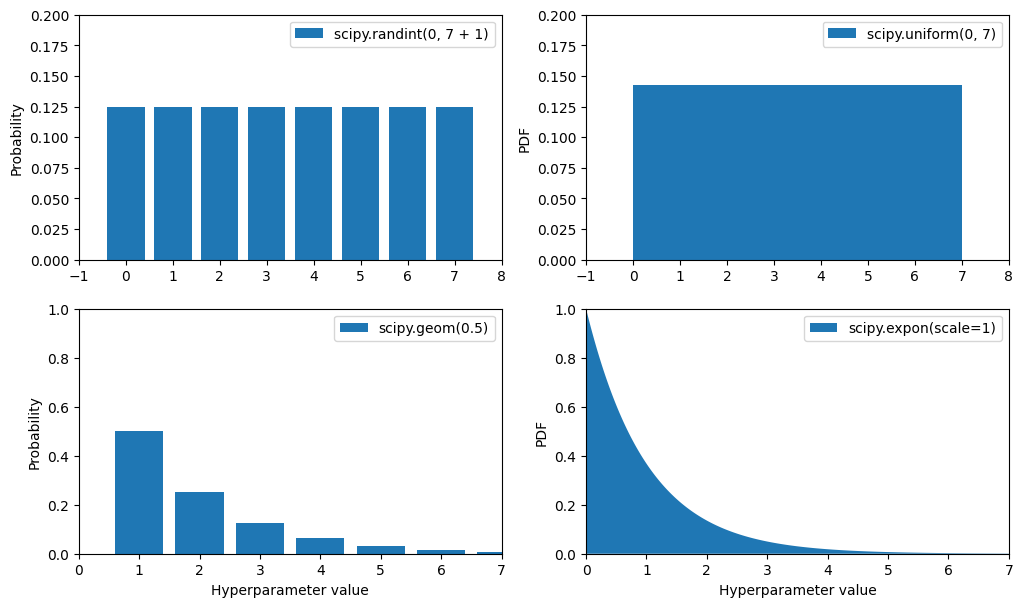

In [134]:
plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

> shows the difference between expon and loguniform

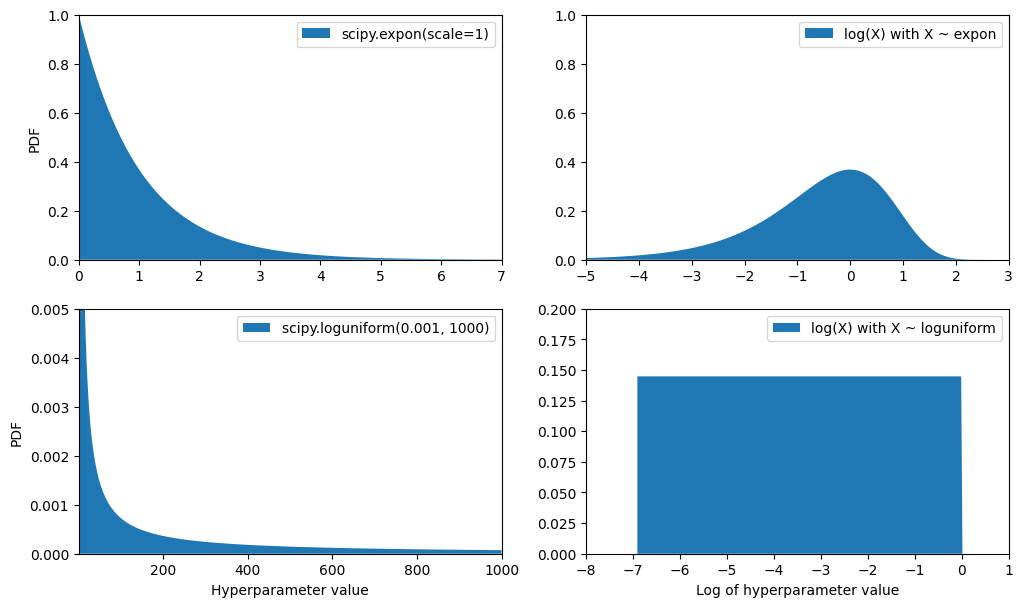

In [135]:
from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

### 🚀 **Ensemble Methods**

結合表現最好的多個模型來提升系統性能的方法，這組模型通常會 `比單個最佳模型更有效` ，特別是當個別模型出現不同類型錯誤的情況下。

1. 隨機森林 Ramdom forests

2. Train and Fine-tune a k-nearest -> create an ensemble model (CH7)

### 🚀 **Analyzing the Best Models and Their Errors**

The **RandomForestRegressor** can indicate the relative importance of each attribute for making accurate predictions：

1. **獲取最佳模型**：從隨機搜索中獲取最佳模型，包括預處理步驟和實際的 RandomForestRegressor。

2. **獲取特徵重要性**：使用最佳模型中的 RandomForestRegressor，獲取每個特徵的相對重要性分數。

3. **分析特徵重要性**：將特徵重要性分數按降序排列，顯示每個特徵名稱和對應的重要性分數。

4. **優化模型**：根據特徵重要性的結果，考慮是否刪除不太有用的特徵。

In [140]:
final_model = rnd_search.best_estimator_ # 從隨機搜索後的解果中，獲取搜索過程中性能最佳的模型
feature_importances = final_model["random_forest"].feature_importances_  # 從最佳模型中提取名為 "random_forest" 的子模型，獲取特徵重要性
feature_importances.round(2)

array([0.07, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.18, 0.01, 0.02, 0.03,
       0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.  , 0.02, 0.02, 0.01, 0.02,
       0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  ,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.  , 0.03, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

> 程式碼解析

1. final_model["preprocessing"].get_feature_names_out()：從 final_model 中取得一名為 preprocessing 的步驟，獲取經過特徵處理後的特徵名稱。

2. zip(feature_importances, final_model["preprocessing"].get_feature_names_out())：用 zip 方法將特徵重要性與特徵名稱配對

3. sorted(..., reverse=True)：按照特徵重要性做降序排列

In [141]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True) 

[(0.1813831690256434, 'log__median_income'),
 (0.08244502861607364, 'cat__ocean_proximity_INLAND'),
 (0.0718801580236537, 'bedrooms__ratio'),
 (0.05817301838233788, 'rooms_per_house__ratio'),
 (0.049517115363919215, 'people_per_house__ratio'),
 (0.03248219147637665, 'geo__Cluster 2 similarity'),
 (0.028221062269895562, 'geo__Cluster 43 similarity'),
 (0.022653278091252674, 'geo__Cluster 6 similarity'),
 (0.02198898088685375, 'geo__Cluster 15 similarity'),
 (0.021199799837403884, 'geo__Cluster 10 similarity'),
 (0.01773675216603871, 'geo__Cluster 11 similarity'),
 (0.016812078342102393, 'geo__Cluster 24 similarity'),
 (0.0166587519568679, 'geo__Cluster 13 similarity'),
 (0.015499668492902265, 'geo__Cluster 1 similarity'),
 (0.014115237838677923, 'geo__Cluster 23 similarity'),
 (0.01354873263940505, 'geo__Cluster 25 similarity'),
 (0.012858660059159845, 'geo__Cluster 0 similarity'),
 (0.012738526960538106, 'remainder__housing_median_age'),
 (0.012678159416906736, 'geo__Cluster 36 similar

### 🚀 **Evaluate Your System on the Test Set**

調整完模型後，最後會使用 Testing set 對最終模型進行評估

In [142]:
x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(x_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

print(final_rmse)

39565.359517373756


> 使用 scipy.stats.t.interval() 計算 95% 的信賴區間

In [143]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([37712.09234569, 41335.61948717])

In [144]:
m = len(squared_errors)
mean = squared_errors.mean()
t_score = stats.t.ppf((1 + confidence) / 2 , df = m -1)
t_margin = t_score * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - t_margin), np.sqrt(mean + t_margin) 

(37712.09234569065, 41335.61948717082)

In [145]:
z_score = stats.norm.ppf((1 + confidence) / 2)
z_margin = z_score * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - z_margin), np.sqrt(mean + z_margin)

(37712.649219257095, 41335.1114228974)

### **🚀 Launch, Monitor, and Maintain Your System**

> Save the final model

In [146]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

> Deploy this model to production

In [149]:
import joblib
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(x):
    return x[:, [0]] / x[:, [1]]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]
predictions = final_model_reloaded.predict(new_data)
print(predictions)

[ 73338.   293339.03  82722.   120297.   226578.  ]


If the data keeps evolving, you will **need to update your datasets and retrain your model** regularly. 

- 定期收集新資料並設定 Lable
- 訓練模型並自動微調超參數，根據需求設定自動執行週期
- 寫另一個程式碼，在更新的測試集上評估新模型和以前的模型
       
    1. 如果效能未下降，則將模型部署到產線中。
    2. 如果效能確實下降，確實地調查下降原因。

**Evaluate the model’s input data quality**


**Make sure you keep backups of every model**